<a href="https://colab.research.google.com/github/sway4em/chem126/blob/main/nonlinear_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from google.colab import files
import pandas as pd

In [3]:
files.upload()

Saving NonlinearFittingWorkshop.csv to NonlinearFittingWorkshop.csv


{'NonlinearFittingWorkshop.csv': b'\xef\xbb\xbfx,y\r\n-10,1.2\r\n-9,4.2\r\n-8,6.7\r\n-7,8.3\r\n-6,10.6\r\n-5,11.7\r\n-4,13.5\r\n-3,14.5\r\n-2,15.7\r\n-1,16.1\r\n0,16.6\r\n1,16\r\n2,15.4\r\n3,14.4\r\n4,14.2\r\n5,12.7\r\n6,10.3\r\n7,8.6\r\n8,6.1\r\n9,3.9\r\n10,2.1\r\n'}

In [9]:
data = pd.read_csv('NonlinearFittingWorkshop.csv')

In [10]:
print(data)

     x     y
0  -10   1.2
1   -9   4.2
2   -8   6.7
3   -7   8.3
4   -6  10.6
5   -5  11.7
6   -4  13.5
7   -3  14.5
8   -2  15.7
9   -1  16.1
10   0  16.6
11   1  16.0
12   2  15.4
13   3  14.4
14   4  14.2
15   5  12.7
16   6  10.3
17   7   8.6
18   8   6.1
19   9   3.9
20  10   2.1


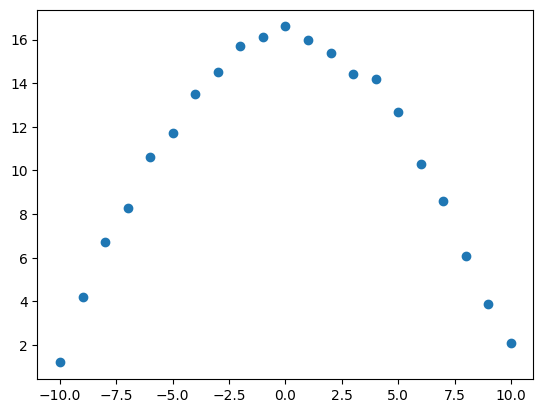

In [15]:
plt.plot(data.x, data.y, 'o')

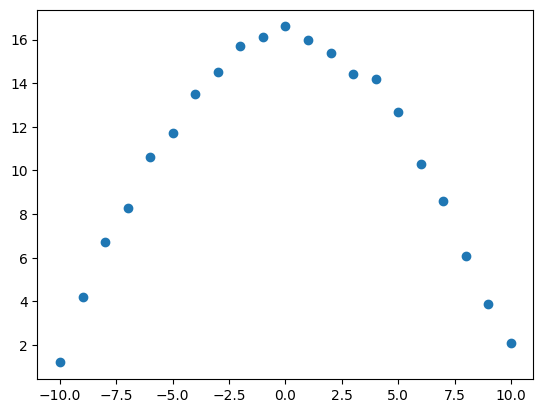

In [30]:
plt.plot(data.iloc[:,0],data.iloc[:,1], 'o')

Fitting parameters from Gauss:  [1.69342863e+01 1.57396009e-02]
Fitting parameters from cos_func:  [0.68226122 0.85834612]
Fitting parameters from cos_func (with initial guess):  [16.31473263  0.14649402]


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


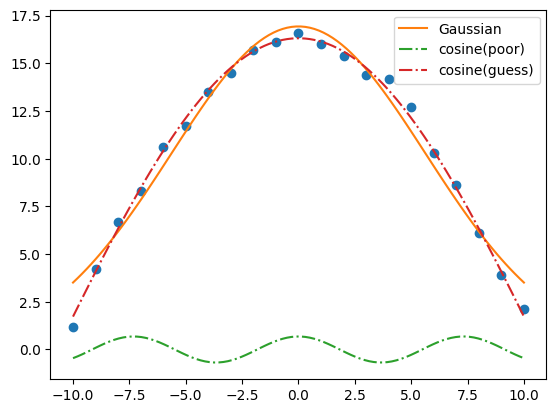

In [52]:
plt.plot(data.iloc[:,0],data.iloc[:,1], 'o')

def Gauss(r, A, B):
  P = A*np.exp(-1*B*r**2)
  return P

parameters, convariance = curve_fit(Gauss, data.x, data.y)
print("Fitting parameters from Gauss: ", parameters)

fit_A = parameters[0]
fit_B = parameters[1]
r_points = np.linspace(-10, 10, 100)
fit_P = Gauss(r_points,fit_A, fit_B)

plt.plot(r_points, fit_P, '-', label='Gaussian')

def cos_func(r, D, E):
  P = D*np.cos(E*r)
  return P

parameters, convariance = curve_fit(cos_func, data.x, data.y)
print("Fitting parameters from cos_func: ", parameters)
fit_D = parameters[0]
fit_E = parameters[1]
fit_P = cos_func(r_points,fit_D, fit_E)
plt.plot(r_points, fit_P, '-.', label='cosine(poor)')
# plt.plot(r_points, cos_func(r_points, 15, 0.2), '-.', label='cosine(guess)')
guess = [15, 0.2]
parameters, covariance = curve_fit(cos_func, data.x, data.y, p0 = guess)
print("Fitting parameters from cos_func (with initial guess): ", parameters)
fit_D = parameters[0]
fit_E = parameters[1]
fit_P = cos_func(r_points,fit_D, fit_E)
plt.plot(r_points, fit_P, '-.', label='cosine(guess)')
plt.legend()

In [68]:
concentrations_glucose = "0.001  0.0025  0.005  0.0075  0.01  0.025  0.05  0.075  0.0883".split("  ")
concentrations_glucose = [float(i) for i in concentrations_glucose]
concentrations_glucose

[0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.0883]

In [90]:
absorbance_per_s = "5.01E-05  9.79E-05  0.000168  0.0002336  0.000284  0.0002772  0.000594  0.000588  0.000627".split("  ")
absorbance_per_s = [float(i) for i in absorbance_per_s]
absorbance_per_s

[5.01e-05,
 9.79e-05,
 0.000168,
 0.0002336,
 0.000284,
 0.0002772,
 0.000594,
 0.000588,
 0.000627]

In [141]:
conc_abs_per_s = "1.36E-03  2.66E-03  4.57E-03  6.35E-03  7.72E-03  7.53E-03  1.61E-02  1.60E-02  1.70E-02".split("  ")
conc_abs_per_s = [float(i)*float("1e-6") for i in conc_abs_per_s]
conc_abs_per_s

[1.36e-09,
 2.66e-09,
 4.57e-09,
 6.35e-09,
 7.72e-09,
 7.53e-09,
 1.61e-08,
 1.6e-08,
 1.7e-08]

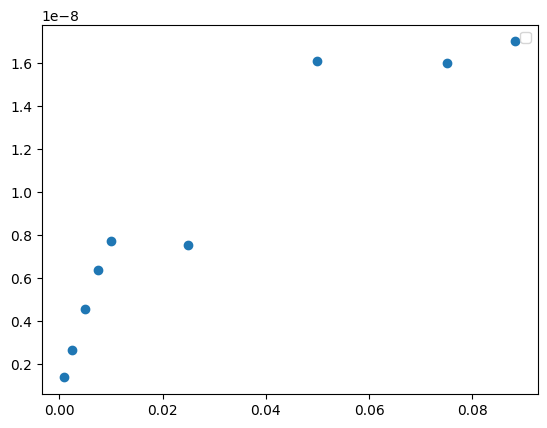

In [142]:
plt.plot(concentrations_glucose,conc_abs_per_s, 'o')
plt.legend()

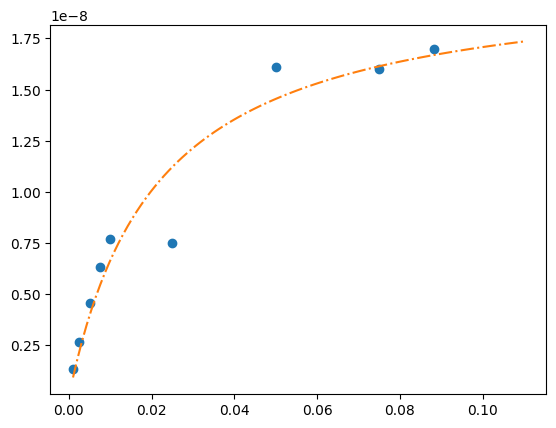

In [143]:
def mm(S, Vmax, Km):
  return (Vmax*S) / (Km + S)

parameters, convariance = curve_fit(mm, concentrations_glucose[:], conc_abs_per_s[:], p0 = [0.016, 0.015])
Vmax, Km = parameters

y_values = []
for x in concentrations_glucose:
  y_values.append(mm(x, Vmax, Km))

plt.plot(concentrations_glucose, conc_abs_per_s, 'o')
# plt.plot(concentrations_glucose, y_values, '-')

r_points = np.linspace(0.001, 0.11, 100)
y_values = [mm(i, Vmax, Km) for i in r_points]
plt.plot(r_points, y_values, '-.')

In [144]:
Vmax

2.0675977325653105e-08